In [2]:
mkdir -p ~/work/songys_chatbot

In [ ]:
"""
2. Ìä∏ÎûúÏä§Ìè¨Î®∏ Íµ¨Ï°∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
ÏïûÏÑú ÏÜåÍ∞úÌñàÎìØ, Ïò§Îäò Ïó¨Îü¨Î∂ÑÎì§Ïù¥ Ïã§ÏäµÌï¥Î≥¥Ïã§ Î™®Îç∏ÏùÄ ‚ÄòÌä∏ÎûúÏä§Ìè¨Î®∏‚ÄôÏûÖÎãàÎã§. 2017ÎÖÑÏóê Î∞úÌëúÎêú Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Î∂ÑÏïºÎ•º ÎÑòÏñ¥ Ïù¥ÎØ∏ÏßÄ Ïù∏Ïãù Î∂ÑÏïºÏóêÎèÑ ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§ÏúºÎ©∞, 2024ÎÖÑ Ï¥àÍπåÏßÄÎèÑ ChatGPT-3, SORA Îì± Îã§ÏñëÌïú Î∂ÑÏïºÏóêÏÑú SOTA Î™®Îç∏Îì§Ïù¥ Ïù¥ Íµ¨Ï°∞Î•º Ï∞®Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎßåÌÅº ÎßéÏù¥ Ï§ëÏöîÌïú Î™®Îç∏Ïù¥Îãà, ÌïôÏäµ ÎÇ¥Ïö©ÏùÑ Ïûò Îî∞ÎùºÏò§ÏãúÍ∏∞ Î∞îÎûÑÍ≤åÏöî!

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî RNN, LSTM Îì±ÏùÑ Í±∞ÏπòÎ©∞ Í∏∞Ï°¥Ïùò Î≥µÏû°Ìï¥ÏßÄÎäî ÏàúÌôò Ï∏µÏù¥ÎÇò Ìï©ÏÑ±Í≥± Ï∏µÏùÑ Ï†ÑÎ∂Ä Ï†úÏô∏ÌïòÍ≥†, Ïñ¥ÌÖêÏÖò Îß§Ïª§ÎãàÏ¶òÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú Î™®Îç∏ÏûÖÎãàÎã§.
Îí§Ï™ΩÏóêÏÑú Î™®Îç∏ Íµ¨Ï°∞Ïùò Í∞Å Î∂ÄÎ∂ÑÏùÑ ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌïòÍ∏∞ Ï†ÑÏóê, Ï†ÑÏ≤¥ Íµ¨Ï°∞Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥Í≥† ÎÑòÏñ¥Í∞ÄÍ≤†ÏäµÎãàÎã§.
"""

In [3]:
# 4. Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÏûÖÎ†• Ïù¥Ìï¥ÌïòÍ∏∞
# Î®ºÏ†Ä ÏïûÏúºÎ°ú ÏßÑÌñâÌïòÎ©¥ÏÑú ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎ•º ÏûÑÌè¨Ìä∏ÌïòÍ≤†ÏäµÎãàÎã§!
!pip install sentencepiece

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import sentencepiece as spm

import math
import os
import re
import urllib.request
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Ìè¨ÏßÄÏÖîÎÑê ÌñâÎ†¨ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥ÏÑú ÎààÏúºÎ°ú ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§!
class PositionalEncoding(nn.Module):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.position = position

        self.pos_encoding = self._build_pos_encoding(position, d_model)

    def _get_angles(self, position, i, d_model):
        return 1.0 / (10000.0 ** ((2.0 * (i // 2)) / d_model)) * position

    def _build_pos_encoding(self, position, d_model):
        pos = torch.arange(position, dtype=torch.float32).unsqueeze(1)
        i = torch.arange(d_model, dtype=torch.float32).unsqueeze(0)

        angle_rads = self._get_angles(pos, i, d_model)
        sines = torch.sin(angle_rads[:, 0::2])
        cosines = torch.cos(angle_rads[:, 1::2])

        pos_encoding = torch.zeros(position, d_model)
        pos_encoding[:, 0::2] = sines
        pos_encoding[:, 1::2] = cosines

        pos_encoding = pos_encoding.unsqueeze(0)  # shape: [1, position, d_model]
        return pos_encoding

    def forward(self, x):
        return x + self.pos_encoding[:, :x.size(1), :].to(x.device)

In [ ]:
"""
ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ Í∑∏Î†§Î¥ÖÏãúÎã§. Ïù¥Î•ºÌÖåÎ©¥, ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 50Ïù¥Í≥† ÏõåÎìú ÏûÑÎ≤†Îî© Ï∞®ÏõêÏùÑ 512Î°ú ÌïòÎäî Î™®Îç∏Ïùò ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏù¥ Ïù¥ÏôÄ Í∞ôÏùÑ Í≤ÉÏûÖÎãàÎã§.

Q.ÏúÑÏùò Î¨∏Ïû•Ï≤òÎüº ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ ÎßåÎìúÎäî ÏΩîÎìúÎ•º ÏôÑÏÑ±ÌïòÏó¨ ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏùÑ ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.

(Ï∂îÍ∞Ä : ÏïÑÎûò ÌÄ¥Ï¶àÎ•º ÌíÄÎ©¥ÏÑú ÏûëÏÑ±Ìïú ÏΩîÎìúÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî.)
"""

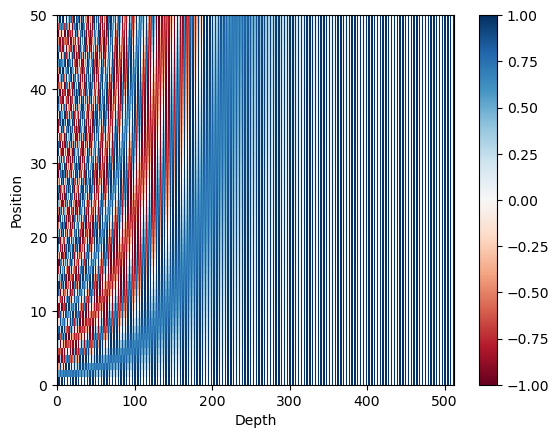

In [7]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [ ]:
"""
Q. ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ 256Ïù¥Í≥† ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 30Ïù∏ ÌÖçÏä§Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Íµ¨ÌòÑÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå, Ï†ÅÏ†àÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Î•º Ï∂îÏ∏°Ìï¥Î≥¥Í≥† ÏúÑÏóê Íµ¨ÌòÑÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©Ìï¥ ÌëúÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.
"""

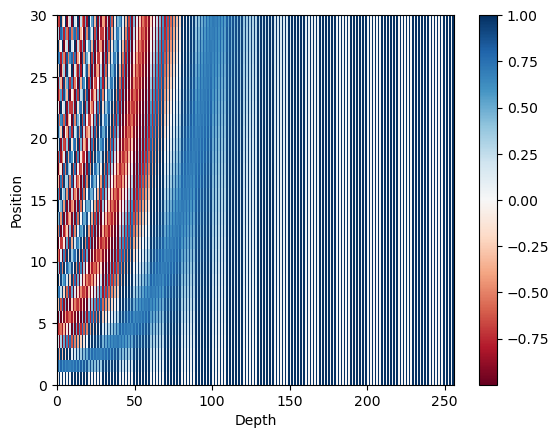

In [9]:
sample_pos_encoding = PositionalEncoding(30, 256)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 256))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [10]:
#Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥Î¥ÖÏãúÎã§.

def scaled_dot_product_attention(query, key, value, mask=None):

    # 1) QÏôÄ KÏùò ÎÇ¥Ï†ÅÏùÑ ÌÜµÌï¥ score(Ïú†ÏÇ¨ÎèÑ) Í≥ÑÏÇ∞
    # key.transpose(-1, -2): (batch_size, heads, depth, seq_len)
    # matmul Í≤∞Í≥º shape: (batch_size, heads, seq_len, seq_len)
    matmul_qk = torch.matmul(query, key.transpose(-1, -2))

    # 2) depthÏóê Îî∞Îùº Ï†ïÍ∑úÌôî
    depth = key.size(-1)  # depth = d_model / heads
    logits = matmul_qk / math.sqrt(depth)

    # 3) ÎßàÏä§ÌÅ¨Í∞Ä Ï£ºÏñ¥Ï°åÎã§Î©¥ -1e9(ÏïÑÏ£º ÏûëÏùÄ Í∞í)Î•º ÎçîÌï¥ ÏÜåÌîÑÌä∏Îß•Ïä§ÏóêÏÑú Ï†úÏô∏ÏãúÌÇ§ÎèÑÎ°ù Ìï®
    if mask is not None:
        # ÌÖêÏÑúÌîåÎ°úÏö∞: logits += (mask * -1e9)
        # ÌååÏù¥ÌÜ†Ïπò ÎèôÏùº Ï†ÅÏö©
        logits = logits + (mask * -1e9)

    # 4) ÏÜåÌîÑÌä∏Îß•Ïä§ Í≥ÑÏÇ∞Ìï¥ attention weights ÏÉùÏÑ±
    attention_weights = F.softmax(logits, dim=-1)

    # 5) attention weightsÏôÄ valueÏùò ÎÇ¥Ï†Å
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

In [12]:
# Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùÑ Íµ¨ÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
# ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°úÎäî Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        # d_modelÏùÄ num_headsÎ°ú ÎÇòÎàÑÏñ¥Îñ®Ïñ¥Ï†∏Ïïº Ìï®
        assert d_model % num_heads == 0

        self.depth = d_model // num_heads

        # ÌååÏù¥ÌÜ†ÏπòÏóêÏÑú DenseÎäî nn.LinearÎ°ú ÎåÄÏùë
        self.query_dense = nn.Linear(d_model, d_model)
        self.key_dense = nn.Linear(d_model, d_model)
        self.value_dense = nn.Linear(d_model, d_model)

        self.out_dense = nn.Linear(d_model, d_model)

    def split_heads(self, x, batch_size):
        """
        x: (batch_size, seq_len, d_model)
        => (batch_size, num_heads, seq_len, depth) ÌòïÌÉúÎ°ú Î≥ÄÌôò
        """
        x = x.view(batch_size, -1, self.num_heads, self.depth)
        x = x.permute(0, 2, 1, 3)  # (batch_size, num_heads, seq_len, depth)
        return x

    def forward(self, query, key, value, mask=None):
        """ 
        query, key, value: (batch_size, seq_len, d_model)
        mask: (batch_size, 1, seq_len, seq_len) Îì±ÏúºÎ°ú broadcast Í∞ÄÎä•ÌïòÎèÑÎ°ù Íµ¨ÏÑ±
        """
        batch_size = query.size(0)

        # Q, K, VÏóê Í∞ÅÍ∞Å Linear Ï†ÅÏö©
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # Head Î∂ÑÌï†
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)

        # (batch_size, num_heads, seq_len, depth) -> (batch_size, seq_len, num_heads, depth)
        scaled_attention = scaled_attention.permute(0, 2, 1, 3).contiguous()

        # Îã§Ïãú (batch_size, seq_len, d_model)Î°ú Ìï©ÏπòÍ∏∞
        concat_attention = scaled_attention.view(batch_size, -1, self.d_model)

        # ÏµúÏ¢Ö Dense
        output = self.out_dense(concat_attention)
        return output


In [13]:
# Îã§ÏùåÏùÄ Ìå®Îî© ÎßàÏä§ÌÇπÏùÑ Íµ¨ÌòÑÌïú Ìï®ÏàòÏûÖÎãàÎã§.
def create_padding_mask(x):
    # x == 0 ÏúÑÏπòÎ•º Ï∞æÏïÑ floatÌòï 1Î°ú Î≥ÄÌôò
    mask = (x == 0).float()
    # (batch_size, seq_len) -> (batch_size, 1, 1, seq_len)
    mask = mask.unsqueeze(1).unsqueeze(2)
    return mask

In [14]:
# Ïù¥ Ìï®ÏàòÏóê Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÎ©¥, Ïù¥ Ìï®ÏàòÎäî Ïà´ÏûêÍ∞Ä 0Ïù∏ Î∂ÄÎ∂ÑÏùÑ Ï≤¥ÌÅ¨Ìïú Î≤°ÌÑ∞Î•º Î¶¨ÌÑ¥Ìï©ÎãàÎã§.
# Îëê Í∞úÏùò Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•ÏúºÎ°ú Ìï¥Î≥¥Í≥†, Í∞ÅÍ∞Å Ïñ¥Îñ§ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎäîÏßÄ Î≥¥Í≤†ÏäµÎãàÎã§.
x = torch.tensor([[1, 2, 0, 3, 0],
                  [0, 0, 0, 4, 5]])
mask = create_padding_mask(x)
print("ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ :", x.shape)    # (2, 5)
print("ÏÉùÏÑ±Îêú ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ :", mask.shape)  # (2, 1, 1, 5)
print(mask)

ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ : torch.Size([2, 5])
ÏÉùÏÑ±Îêú ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ : torch.Size([2, 1, 1, 5])
tensor([[[[0., 0., 1., 0., 1.]]],


        [[[1., 1., 1., 0., 0.]]]])


In [15]:
# Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπ(Look-ahead masking, Îã§Ïùå Îã®Ïñ¥ Í∞ÄÎ¶¨Í∏∞)
def create_look_ahead_mask(x):
    seq_len = x.size(1)

    # (seq_len, seq_len) ÌÅ¨Í∏∞Ïùò ÌïòÏÇºÍ∞Å ÌñâÎ†¨(tril) ÏÉùÏÑ± ÌõÑ 1ÏóêÏÑú ÎπºÏÑú
    # ÏÉÅÏÇºÍ∞ÅÏù¥ 1, ÌïòÏÇºÍ∞Å(ÏûêÍ∏∞ ÏûêÏã† Ìè¨Ìï®)Ïù¥ 0Ïù¥ ÎêòÎèÑÎ°ù ÏÑ§Ï†ï
    # => ÎØ∏Îûò ÌÜ†ÌÅ∞(ÏûêÏã† Ïù∏Îç±Ïä§Î≥¥Îã§ ÌÅ∞ ÏúÑÏπò) ÎßàÏä§ÌÇπ
    look_ahead_mask = 1 - torch.tril(torch.ones((seq_len, seq_len)))

    # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± (shape: (batch_size, 1, 1, seq_len))
    padding_mask = create_padding_mask(x)

    # look_ahead_mask: (seq_len, seq_len) -> (1, seq_len, seq_len)
    look_ahead_mask = look_ahead_mask.unsqueeze(0)
    # -> (1, seq_len, seq_len) -> (1, 1, seq_len, seq_len)
    look_ahead_mask = look_ahead_mask.unsqueeze(1)
    look_ahead_mask = look_ahead_mask.to(x.device)

    # look-ahead ÎßàÏä§ÌÅ¨ÏôÄ Ìå®Îî© ÎßàÏä§ÌÅ¨Î•º Ìï©ÏÑ± (Îëò Ï§ë ÌïòÎÇòÎùºÎèÑ 1Ïù¥Î©¥ ÎßàÏä§ÌÇπ)
    # ÏµúÏ¢Ö shapeÏùÄ Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖÏúºÎ°ú (batch_size, 1, seq_len, seq_len)
    combined_mask = torch.max(look_ahead_mask, padding_mask)
    return combined_mask

In [16]:
x = torch.tensor([[1, 2, 3, 4, 5]])
mask_1 = create_look_ahead_mask(x)
print("Ï≤´ Î≤àÏß∏ ÏãúÌÄÄÏä§:\n", mask_1, mask_1.shape)

Ï≤´ Î≤àÏß∏ ÏãúÌÄÄÏä§:
 tensor([[[[0., 1., 1., 1., 1.],
          [0., 0., 1., 1., 1.],
          [0., 0., 0., 1., 1.],
          [0., 0., 0., 0., 1.],
          [0., 0., 0., 0., 0.]]]]) torch.Size([1, 1, 5, 5])


In [17]:
# Ìå®Îî© ÎßàÏä§ÌÅ¨ Ìè¨Ìï® ÏãúÌÇ§Í∏∞
x2 = torch.tensor([[0, 5, 1, 5, 5]])
mask_2 = create_look_ahead_mask(x2)
print("Îëê Î≤àÏß∏ ÏãúÌÄÄÏä§:\n", mask_2, mask_2.shape)

Îëê Î≤àÏß∏ ÏãúÌÄÄÏä§:
 tensor([[[[1., 1., 1., 1., 1.],
          [1., 0., 1., 1., 1.],
          [1., 0., 0., 1., 1.],
          [1., 0., 0., 0., 1.],
          [1., 0., 0., 0., 0.]]]]) torch.Size([1, 1, 5, 5])


In [18]:
#Îëê Í∞úÏùò ÏÑúÎ∏å Ï∏µÏùÑ Í∞ÄÏßÄÎäî ÌïòÎÇòÏùò Ïù∏ÏΩîÎçî Ï∏µÏùÑ Íµ¨ÌòÑÌïòÎäî Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§. 
# Ìï®Ïàò ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Ï∏µÍ≥º Îëê Î≤àÏß∏ ÏÑúÎ∏å Ï∏µÏùÑ Íµ¨ÌòÑÌïòÍ≥† ÏûàÏäµÎãàÎã§.
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, ff_dim, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)  # Ïù¥Ï†ÑÏóê Íµ¨ÌòÑÌïú MHA
        self.dropout1 = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(d_model, eps=1e-6)

        # ÌîºÎìúÌè¨ÏõåÎìú Î∂ÄÎ∂Ñ (Dense -> ReLU -> Dense)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, d_model)
        )
        self.dropout2 = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(d_model, eps=1e-6)

    def forward(self, x, mask=None):
        # (1) Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
        attn_output = self.mha(x, x, x, mask)  # (batch_size, seq_len, d_model)
        attn_output = self.dropout1(attn_output)
        out1 = self.norm1(x + attn_output)     # ÏûîÏ∞® Ïó∞Í≤∞ + LayerNorm

        # (2) ÌîºÎìúÌè¨ÏõåÎìú Ïã†Í≤ΩÎßù
        ffn_output = self.ffn(out1)            # (batch_size, seq_len, d_model)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.norm2(out1 + ffn_output)   # ÏûîÏ∞® Ïó∞Í≤∞ + LayerNorm

        return out2


In [19]:
#Ïù¥Î†áÍ≤å Íµ¨ÌòÑÌïú Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏûÑÎ≤†Îî© Ï∏µ(Embedding layer) Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(Positional Encoding) ÏùÑ Ïó∞Í≤∞ÌïòÍ≥†, 
#ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî ÎßåÌÅº Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏåìÏùåÏúºÎ°úÏç® Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ïù∏ÏΩîÎçîÍ∞Ä ÏôÑÏÑ±Îê©ÎãàÎã§.

class Encoder(nn.Module):
    def __init__(self,
                 vocab_size,
                 num_layers,
                 ff_dim,
                 d_model,
                 num_heads,
                 dropout=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model

        # (1) ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
        self.embedding = nn.Embedding(vocab_size, d_model)

        # (2) Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
        self.pos_encoding = PositionalEncoding(position=vocab_size, d_model=d_model)

        self.dropout = nn.Dropout(dropout)

        # (3) EncoderLayer ÏåìÍ∏∞
        self.enc_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, ff_dim, dropout)
            for _ in range(num_layers)
        ])

    def forward(self, x, mask=None):
        # (1) ÏûÑÎ≤†Îî© & sqrt(d_model)Î°ú Ïä§ÏºÄÏùºÎßÅ
        x = self.embedding(x) * math.sqrt(self.d_model)

        # (2) Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Ï†ÅÏö© + ÎìúÎ°≠ÏïÑÏõÉ
        x = self.pos_encoding(x)  # shape: (batch_size, seq_len, d_model)
        x = self.dropout(x)

        # (3) num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ EncoderLayer ÌÜµÍ≥º
        for layer in self.enc_layers:
            x = layer(x, mask)

        return x

In [20]:
# ÎîîÏΩîÎçîÏùò ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Ï∏µÏùÑ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Íµ¨ÌòÑÌïú ÎîîÏΩîÎçîÏùò Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, ff_dim, dropout=0.1):
        super(DecoderLayer, self).__init__()

        # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ (ÎîîÏΩîÎçî ÎÇ¥Î∂Ä ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
        self.self_mha = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model, eps=1e-6)

        # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
        self.encdec_mha = MultiHeadAttention(d_model, num_heads)
        self.norm2 = nn.LayerNorm(d_model, eps=1e-6)

        # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ (ÌîºÎìúÌè¨ÏõåÎìú ÎÑ§Ìä∏ÏõåÌÅ¨)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, ff_dim),  # Dense(units=ff_dim)
            nn.ReLU(),                   # activation='relu'
            nn.Linear(ff_dim, d_model)   # Dense(units=d_model)
        )
        self.norm3 = nn.LayerNorm(d_model, eps=1e-6)

        # ÎìúÎ°≠ÏïÑÏõÉ
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)

    def forward(self, x, enc_outputs, look_ahead_mask=None, padding_mask=None):
        # 1) ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò (ÎîîÏΩîÎçî ÎÇ¥Î∂Ä)
        self_attn_out = self.self_mha(x, x, x, mask=look_ahead_mask)
        self_attn_out = self.dropout1(self_attn_out)
        out1 = self.norm1(x + self_attn_out)  # ÏûîÏ∞® Ïó∞Í≤∞ + LayerNorm

        # 2) Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò
        encdec_attn_out = self.encdec_mha(out1, enc_outputs, enc_outputs, mask=padding_mask)
        encdec_attn_out = self.dropout2(encdec_attn_out)
        out2 = self.norm2(out1 + encdec_attn_out)  # ÏûîÏ∞® Ïó∞Í≤∞ + LayerNorm

        # 3) ÌîºÎìúÌè¨ÏõåÎìú (Dense -> ReLU -> Dense)
        ffn_out = self.ffn(out2)
        ffn_out = self.dropout3(ffn_out)
        out3 = self.norm3(out2 + ffn_out)  # ÏûîÏ∞® Ïó∞Í≤∞ + LayerNorm

        return out3


In [21]:
# ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏïÑ ÎîîÏΩîÎçî ÎßåÎì§Í∏∞
class Decoder(nn.Module):
    def __init__(self,
                 vocab_size,
                 num_layers,
                 ff_dim,
                 d_model,
                 num_heads,
                 dropout=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model

        # (1) ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
        self.embedding = nn.Embedding(vocab_size, d_model)

        # (2) Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
        # Ïã§Ï†ú ÌïôÏäµ ÏãúÏóêÎäî ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥Ïóê ÎßûÏ∂îÏñ¥ Ïì∞Í∏∞ÎèÑ Ìï®
        self.pos_encoding = PositionalEncoding(position=vocab_size, d_model=d_model)

        self.dropout = nn.Dropout(dropout)

        # (3) DecoderLayer ÏåìÍ∏∞
        self.dec_layers = nn.ModuleList([
            DecoderLayer(d_model, num_heads, ff_dim, dropout)
            for _ in range(num_layers)
        ])

    def forward(self, x, enc_outputs, look_ahead_mask=None, padding_mask=None):
        # (1) ÏûÑÎ≤†Îî© + sqrt(d_model)Î°ú Ïä§ÏºÄÏùºÎßÅ
        x = self.embedding(x) * math.sqrt(self.d_model)

        # (2) Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© + ÎìúÎ°≠ÏïÑÏõÉ
        x = self.pos_encoding(x)    # (batch_size, tgt_seq_len, d_model)
        x = self.dropout(x)

        # (3) num_layersÎßåÌÅº ÏåìÏù∏ DecoderLayer ÌÜµÍ≥º
        for layer in self.dec_layers:
            x = layer(x, enc_outputs, look_ahead_mask, padding_mask)

        return x

In [ ]:
"""
Ïù¥Ï†ú Ïù∏ÏΩîÎçî Ï∏µÍ≥º ÎîîÏΩîÎçî Ï∏µÏùÑ Í∞ÅÍ∞Å Ìï®ÏàòÎ°ú Íµ¨ÌòÑÌïòÏòÄÏäµÎãàÎã§.

Ïù¥Î•º ÌïòÎÇòÎ°ú Ï°∞Ìï©ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÏùÑ ÌÖêÎç∞, 
Ïö∞ÏÑ† Í∑∏Ï†ÑÏóê Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Ìï† Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†, Ï†ÑÏ≤òÎ¶¨Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
"""

In [22]:
# ÏΩîÎÑ¨ ÎåÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú URL
url = 'http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip'
zip_filename = 'cornell_movie_dialogs.zip'

# Ïù¥ÎØ∏ ÌååÏùºÏù¥ ÏóÜÎäî Í≤ΩÏö∞ÏóêÎßå Îã§Ïö¥Î°úÎìú
if not os.path.exists(zip_filename):
    print(f"Downloading {zip_filename} ...")
    urllib.request.urlretrieve(url, zip_filename)
    print("Download complete.")

# ZIP ÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()  # ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê ÌíÄÎ¶º

# ÏΩîÎÑ¨ ÎåÄÏÇ¨ Îç∞Ïù¥ÌÑ∞ Ìè¥Îçî Í≤ΩÎ°ú
path_to_dataset = os.path.join(os.getenv('HOME'), "cornell movie-dialogs corpus")

# Í∞úÎ≥Ñ ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset, 'movie_conversations.txt')

print("path_to_dataset:", path_to_dataset)
print("path_to_movie_lines:", path_to_movie_lines)
print("path_to_movie_conversations:", path_to_movie_conversations)

Download complete.
path_to_dataset: /home/jovyan/cornell movie-dialogs corpus
path_to_movie_lines: /home/jovyan/cornell movie-dialogs corpus/movie_lines.txt
path_to_movie_conversations: /home/jovyan/cornell movie-dialogs corpus/movie_conversations.txt


In [23]:
#Ïó¨Í∏∞ÏÑú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îäî Ïã§Ïäµ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë ÏùºÎ∂ÄÏûÖÎãàÎã§.
# Ïö∞ÏÑ†, Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú 5Îßå Í∞úÎßå Í∞ÄÏ†∏Ïò§ÎèÑÎ°ù ÌïòÍ≥† ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùò ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ÄÍ≥µÌï©ÎãàÎã§.
# ÏÇ¨Ïö©Ìï† ÏÉòÌîåÏùò ÏµúÎåÄ Í∞úÏàò
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


In [24]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
  # ÏûÖÎ†•Î∞õÏùÄ sentenceÎ•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
  sentence = sentence.lower().strip()

  # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
  # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("Ïäù=3")

Ïäù=3


In [25]:
# Í∑∏Îüº Î∞©Í∏à ÎßåÎì† Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÌÖåÏä§Ìä∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
sample_sentence = "ÏïàÎÖïÌïòÏÑ∏Ïöî? Hello! I'm a studentüòä, nice to meet you!"

preprocessed_sentence = preprocess_sentence(sample_sentence)
print(preprocessed_sentence)

? hello ! i m a student , nice to meet you !


In [26]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî ÎèôÏãúÏóê Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.
def read_cornell_data(path_to_movie_lines, path_to_movie_conversations, max_samples=50000):
    id2line = {}
    with open(path_to_movie_lines, 'r', errors='ignore') as f:
        lines = f.readlines()
    for line in lines:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) >= 5:
            line_id = parts[0]
            text = parts[4]
            id2line[line_id] = text

    pairs = []
    with open(path_to_movie_conversations, 'r', errors='ignore') as f:
        conv_lines = f.readlines()
    for line in conv_lines:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) < 4:
            continue
        # ÎåÄÌôî ID Î™©Î°ù Ï∂îÏ∂ú: ["L1045","L1044","L1043", ...]
        conv_str = parts[3]
        conv_list = conv_str[1:-1].split(", ")
        conv_list = [c.strip("'") for c in conv_list]  # "'L1045'" -> "L1045"

        # Ïó∞ÏÜçÎêú Îëê Î¨∏Ïû•Ïî© (ÏßàÎ¨∏, ÎãµÎ≥Ä) Íµ¨ÏÑ±
        for i in range(len(conv_list) - 1):
            q_id = conv_list[i]
            a_id = conv_list[i+1]
            q_text = id2line.get(q_id, "")
            a_text = id2line.get(a_id, "")
            # Í∞ÑÎã® Ï†ÑÏ≤òÎ¶¨(ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Ï†ïÎèÑÎßå ÏòàÏãú)
            q_text = preprocess_sentence(q_text)
            a_text = preprocess_sentence(a_text)

            pairs.append((q_text, a_text))
            if len(pairs) >= max_samples:
                return pairs
    return pairs

In [28]:
# Ïù¥Î†áÍ≤å Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÏÉòÌîå ÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥ºÍπåÏöî?
pairs = read_cornell_data(path_to_movie_lines, path_to_movie_conversations, max_samples=MAX_SAMPLES)

print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(pairs))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 50000


In [29]:
# 1. Tokenizer ÌïôÏäµÌïòÍ∏∞
# Ïö∞ÏÑ† ÏúÑÏóêÏÑú ÎßåÎì† pairÎ•º ÌÖçÏä§Ìä∏ ÌååÏùºÏóê Ï†ÄÏû•ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
corpus_file = "clean_corpus.txt"
with open(corpus_file, 'w', encoding='utf-8') as f:
    for q, a in pairs:
        f.write(q + "\n")
        f.write(a + "\n")

In [30]:
# ÏßàÎ¨∏-ÎãµÎ≥Ä ÏåçÏù¥ Îã¥Í∏¥ clean_corpus.txt ÌååÏùºÏùÑ Ïù¥Ïö©Ìï¥ SentencePiece Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥†, 
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Îã¥Í∏∏ model / vocab ÌååÏùºÏùÑ ÏÉùÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§.

spm.SentencePieceTrainer.Train(
    input=corpus_file,
    model_prefix="spm_cornell",
    vocab_size=8000,
    character_coverage=1.0,
    model_type="bpe",
    max_sentence_length=999999,
    bos_id=1,  # <s> (Beginning of Sentence) ÏÑ§Ï†ï
    eos_id=2,  # </s> (End of Sentence) ÏÑ§Ï†ï
    pad_id=0,  # Padding ID ÏÑ§Ï†ï
    unk_id=3   # Unknown Token ID ÏÑ§Ï†ï
)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: clean_corpus.txt
  input_format: 
  model_prefix: spm_cornell
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 999999
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 3
  bos_id: 1
  eos_id: 2
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ‚Åá 
  enable_differential_privacy: 0
  diff

In [31]:
# Í∑∏Îüº ÌïôÏäµÏãúÌÇ® ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î∂àÎü¨ÏôÄ ÌÖåÏä§Ìä∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
sp = spm.SentencePieceProcessor()
sp.Load("spm_cornell.model")

True

In [32]:
# ÏòàÏ†ú Î¨∏Ïû•
sentence = "I'm learning PyTorch with SentencePiece!"

sentence = preprocess_sentence(sentence)
print("Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò Î¨∏Ïû•:", sentence)

# 1. ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï (subword Îã®ÏúÑÎ°ú Î∂ÑÌï†)
tokens = sp.encode(sentence, out_type=str)
print("Tokenized:", tokens)

# 2. Ïù∏ÏΩîÎî© (ÏÑúÎ∏åÏõåÎìúÎ•º Ï†ïÏàò IDÎ°ú Î≥ÄÌôò)
encoded = sp.encode(sentence, out_type=int)
print("Encoded:", encoded)

# 3. ÎîîÏΩîÎî© (Ï†ïÏàò ID ‚Üí ÏõêÎ≥∏ Î¨∏Ïû• Î≥µÏõê)
decoded = sp.decode(encoded)
print("Decoded:", decoded)


Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò Î¨∏Ïû•: i m learning pytorch with sentencepiece !
Tokenized: ['‚ñÅi', '‚ñÅm', '‚ñÅlearning', '‚ñÅp', 'y', 't', 'or', 'ch', '‚ñÅwith', '‚ñÅsent', 'ence', 'p', 'iece', '‚ñÅ!']
Encoded: [6, 13, 4954, 37, 7983, 7971, 36, 119, 113, 1412, 651, 7991, 4122, 69]
Decoded: i m learning pytorch with sentencepiece !


In [33]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî ÎèôÏãúÏóê Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.
class CornellDataset(Dataset):
    def __init__(self, pairs, sp, max_length=40):
        super().__init__()
        self.sp = sp
        self.max_length = max_length
        self.data = []

        for q_text, a_text in pairs:
            # 1) ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
            q_ids = sp.EncodeAsIds(q_text)
            a_ids = sp.EncodeAsIds(a_text)

            # 2) [CLS]/[SEP] Í∞ôÏùÄ Î≥ÑÎèÑ Ïä§ÌéòÏÖú ÌÜ†ÌÅ∞ÏùÑ Ïì∏ ÏàòÎèÑ ÏûàÏúºÎÇò,
            #    Ïó¨Í∏∞ÏÑúÎäî SentencePiece Í∏∞Î≥∏ <s>, </s> Îì± ÌòπÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌÜ†ÌÅ∞ ÌôúÏö© Í∞ÄÎä•
            #    Í∞ÑÎã®Ìûà <s>=sp.bos_id(), </s>=sp.eos_id()Î°ú Í∞ÄÏ†ïÌï¥Î≥∏Îã§Î©¥:
            #    sp.SetEncodeExtraOptions("bos:eos") Îì±ÏúºÎ°ú ÏÑ§Ï†ïÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÏùå.
            # Ïó¨Í∏∞ÏÑúÎäî ÏàòÎèôÏúºÎ°ú bos/eos idÎ•º Î∂ôÏù∏Îã§Í≥† Í∞ÄÏ†ï
            bos_id = sp.bos_id() if sp.bos_id() >= 0 else 1  # ÌòπÏùÄ ÏûÑÏùòÍ∞í
            eos_id = sp.eos_id() if sp.eos_id() >= 0 else 2

            q_tokens = [bos_id] + q_ids + [eos_id]
            a_tokens = [bos_id] + a_ids + [eos_id]

            # 3) Í∏∏Ïù¥ Ï†úÌïú
            if len(q_tokens) > max_length or len(a_tokens) > max_length:
                continue

            # 4) Í≥†Ï†ï Í∏∏Ïù¥ Ìå®Îî©
            q_tokens += [0]*(max_length - len(q_tokens))  # 0 -> <pad> Í∞ÄÏ†ï
            a_tokens += [0]*(max_length - len(a_tokens))

            # 5) ÎîîÏΩîÎçî ÏûÖÎ†•(dec_input): a_tokens[:-1], ÌÉÄÍ≤ü(outputs): a_tokens[1:]
            #    (teacher forcingÏö©)
            dec_input = a_tokens[:-1]
            target = a_tokens[1:]

            self.data.append({
                "enc_input": q_tokens,
                "dec_input": dec_input,
                "target": target
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        enc_input = torch.tensor(sample["enc_input"], dtype=torch.long)
        dec_input = torch.tensor(sample["dec_input"], dtype=torch.long)
        target = torch.tensor(sample["target"], dtype=torch.long)
        return enc_input, dec_input, target

In [34]:
dataset = CornellDataset(pairs, sp, max_length=40)

In [35]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌïòÎÇòÎßå Í∞ÄÏ†∏ÏôÄÎ≥¥Í≤†ÏäµÎãàÎã§.

for encoder_input, decoder_input, decoder_label  in dataset:
    print("ÌÖêÏÑú ÌÅ¨Í∏∞ :",encoder_input.size())
    print(encoder_input)
    print(sp.decode(encoder_input.tolist()))
    print(decoder_input)
    print(sp.decode(decoder_input.tolist()))
    print(decoder_label)
    print(sp.decode(decoder_label.tolist()))
    break

ÌÖêÏÑú ÌÅ¨Í∏∞ : torch.Size([40])
tensor([   1,  115,   52,  321,   99, 1609,   23,  304, 7997, 7734,   62,   36,
        7978,  271,   61,   61,  891, 6222,  121, 1060,   39, 3631, 7741, 1337,
          15,  141,  280, 1882,  919,  161,   72,   19,  333,  103,    5,  463,
           5,    2,    0,    0])
can we make this quick ? roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad . again .
tensor([   1,  189,   17,    6,  450,   52,   20,  539,  113,  523,   21,  182,
        5984,   17,  156,   57,   10,  358,  113,   14,    5,    2,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0])
well , i thought we d start with pronunciation , if that s okay with you .
tensor([ 189,   17,    6,  450,   52,   20,  539,  113,  523,   21,  182, 5984,
          17,  156,   57,   10,  358,  113,   14,    5,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

In [36]:
# 3. DataLoader Íµ¨ÏÑ±ÌïòÍ∏∞
# ÏúÑÏôÄ Í∞ôÏù¥ Îç∞Ïù¥ÌÑ∞Î•º Dataset Í∞ùÏ≤¥Î°ú Ïûò ÎßåÎì§ÏóàÎã§Î©¥ Îç∞Ïù¥ÌÑ∞Î°úÎçîÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ Í∞ÑÎã®ÌïòÍ≤å ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§.
dataloader = DataLoader(dataset,batch_size=32,shuffle=True)

In [37]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎçîÏùò Í≤ΩÏö∞ ÏùºÎ∞òÏ†ÅÏù∏ Ïù∏Îç±Ïã± Î∞©ÏãùÏúºÎ°ú Î∂àÎü¨Ïò¨ Í≤ΩÏö∞ ÏóêÎü¨Í∞Ä ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê 
#ÏïÑÎûòÏôÄ Í∞ôÏù¥ for Î¨∏ÏùÑ ÌôúÏö©Ìï¥ Î∂àÎü¨ÏòµÎãàÎã§. 
#Ïù¥ÎØ∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Îì§Ïñ¥ÏûàÎäîÏßÄÎäî ÌôïÏù∏ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïó¨Í∏∞ÏóêÏÑúÎäî batch Îã®ÏúÑÎ°ú Ïûò Î∂àÎü¨ÏôÄÏßÄÎäîÏßÄÎßå ÌôïÏù∏ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
for encoder_input, decoder_input, decoder_label in dataloader:
    print(encoder_input.size())
    print(decoder_input.size())
    print(decoder_label.size())
    break

torch.Size([32, 40])
torch.Size([32, 39])
torch.Size([32, 39])


In [38]:
# 13. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµÌïòÍ∏∞
# Ïù¥Ï†ú ÏïûÏÑú ÏÇ¨Ïö©Ìïú Ïù∏ÏΩîÎçî Ï∏µ Ìï®ÏàòÏôÄ ÎîîÏΩîÎçî Ï∏µ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
class Transformer(nn.Module):
    def __init__(self,
                 vocab_size,
                 num_layers,      # Ïù∏ÏΩîÎçî/ÎîîÏΩîÎçî Ï∏µ Ïàò
                 units,           # feed-forward ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Ï§ëÍ∞Ñ Ï∞®Ïõê(ff_dim)
                 d_model,         # ÏûÑÎ≤†Îî© Î∞è ÎÇ¥Î∂Ä ÌëúÌòÑ Ï∞®Ïõê
                 num_heads,       # Î©ÄÌã∞Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Ìó§Îìú Ïàò
                 dropout=0.1):
        super(Transformer, self).__init__()

        # Ïù∏ÏΩîÎçî
        self.encoder = Encoder(
            vocab_size=vocab_size,
            num_layers=num_layers,
            ff_dim=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout
        )

        # ÎîîÏΩîÎçî
        self.decoder = Decoder(
            vocab_size=vocab_size,
            num_layers=num_layers,
            ff_dim=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout
        )

        # ÏµúÏ¢Ö Ï∂úÎ†•Ï∏µ: (d_model) -> (vocab_size)
        self.final_linear = nn.Linear(d_model, vocab_size)

        # Ï∞∏Í≥†: ÌÖêÏÑúÌîåÎ°úÏö∞ ÏΩîÎìúÏùò `name="transformer"`Îäî ÌååÏù¥ÌÜ†ÏπòÏóêÏÑ† Î≥¥ÌÜµ ÏÇ¨Ïö© Ïïà Ìï®

    def forward(self, inputs, dec_inputs):
        # 1) Ïù∏ÏΩîÎçî Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
        enc_padding_mask = create_padding_mask(inputs)     # shape (batch_size, 1, 1, src_seq_len)

        # 2) ÎîîÏΩîÎçî look-ahead + Ìå®Îî© ÎßàÏä§ÌÅ¨
        look_ahead_mask = create_look_ahead_mask(dec_inputs)  # shape (batch_size, 1, tgt_seq_len, tgt_seq_len)

        # 3) ÎîîÏΩîÎçîÏóêÏÑú Ïù∏ÏΩîÎçî Ï∂úÎ†• Ï™ΩÏùÑ ÎßàÏä§ÌÇπÌï† Îïå Ïì∏ Ìå®Îî© ÎßàÏä§ÌÅ¨
        dec_padding_mask = create_padding_mask(inputs)        # shape (batch_size, 1, 1, src_seq_len)

        # 4) Ïù∏ÏΩîÎçî ÏàòÌñâ
        enc_outputs = self.encoder(
            x=inputs,
            mask=enc_padding_mask
        )  # shape: (batch_size, src_seq_len, d_model)

        # 5) ÎîîÏΩîÎçî ÏàòÌñâ
        dec_outputs = self.decoder(
            x=dec_inputs,           # (batch_size, tgt_seq_len)
            enc_outputs=enc_outputs,# (batch_size, src_seq_len, d_model)
            look_ahead_mask=look_ahead_mask,
            padding_mask=dec_padding_mask
        )  # shape: (batch_size, tgt_seq_len, d_model)

        # 6) ÏµúÏ¢Ö Dense (vocab_size)
        logits = self.final_linear(dec_outputs)  # (batch_size, tgt_seq_len, vocab_size)
        return logits

In [39]:
# 1. Î™®Îç∏ ÏÉùÏÑ±

# Ïòà: ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
NUM_LAYERS = 2     # Ïù∏ÏΩîÎçî/ÎîîÏΩîÎçî Ï∏µ Ïàò
D_MODEL = 256      # ÏûÑÎ≤†Îî© Î∞è ÎÇ¥Î∂Ä ÌëúÌòÑ Ï∞®Ïõê
NUM_HEADS = 8      # Î©ÄÌã∞Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò
UNITS = 512        # ÌîºÎìúÌè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâ Ï∞®Ïõê
DROPOUT = 0.1      # ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú®
VOCAB_SIZE = 8000 # Îã®Ïñ¥ ÏßëÌï© ÌÅ¨Í∏∞(ÏòàÏãú)

# Î™®Îç∏ ÏÉùÏÑ±
model = Transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT
)

print(model)

Transformer(
  (encoder): Encoder(
    (embedding): Embedding(8000, 256)
    (pos_encoding): PositionalEncoding()
    (dropout): Dropout(p=0.1, inplace=False)
    (enc_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (mha): MultiHeadAttention(
          (query_dense): Linear(in_features=256, out_features=256, bias=True)
          (key_dense): Linear(in_features=256, out_features=256, bias=True)
          (value_dense): Linear(in_features=256, out_features=256, bias=True)
          (out_dense): Linear(in_features=256, out_features=256, bias=True)
        )
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
        (ffn): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): ReLU()
          (2): Linear(in_features=512, out_features=256, bias=True)
        )
        (dropout2): Dropout(p=0.1, inplace=False)
        (norm2): LayerNorm((256,), eps=1e-06, elementwise_aff

In [40]:
# 2. ÏÜêÏã§ Ìï®Ïàò(Loss function)
#Î†àÏù¥Î∏îÏù∏ ÏãúÌÄÄÏä§Ïóê Ìå®Îî©Ïù¥ ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå Ìå®Îî© ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©Ìï¥Ïïº Ìï©ÎãàÎã§.
loss_function = nn.CrossEntropyLoss(ignore_index=sp.pad_id())

In [ ]:
# 3. Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(Learning rate)
"""
Îî•Îü¨Îãù Î™®Îç∏ÌïôÏäµ Ïãú learning rateÎäî Îß§Ïö∞ Ï§ëÏöîÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§. ÏµúÍ∑ºÏóêÎäî Î™®Îç∏ÌïôÏäµ Ï¥àÍ∏∞Ïóê learning rateÎ•º Í∏âÍ≤©Ìûà ÎÜíÏòÄÎã§Í∞Ä, Ïù¥ÌõÑ train stepÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº ÏÑúÏÑúÌûà ÎÇÆÏ∂îÏñ¥ Í∞ÄÎ©¥ÏÑú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÍ≤å ÌïòÎäî Í≥†Í∏â Í∏∞Î≤ïÏùÑ ÎÑêÎ¶¨ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥Îü∞ Î∞©Î≤ïÏùÑ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ(Custom Learning rate Scheduling)Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨Î•º ÌÜµÌïú ÏïÑÎã¥ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
"""

In [41]:
def get_lr_lambda(d_model, warmup_steps=4000):
    d_model = float(d_model)
    def lr_lambda(step):
        # stepÏùÄ 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎØÄÎ°ú +1Î°ú Î≥¥Ï†ï
        step = step + 1
        return (d_model ** -0.5) * min(step ** -0.5, step * (warmup_steps ** -1.5))
    return lr_lambda

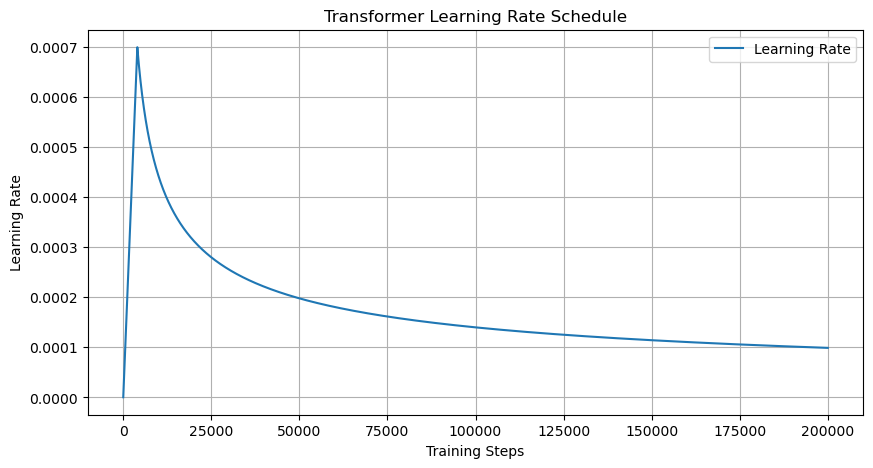

In [42]:
#Í∑∏Îü¨Î©¥ Î∞©Í∏à Ï†ïÏùòÌïú Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ Í≥ÑÌöçÏùÑ ÏãúÍ∞ÅÌôîÌï¥ Î¥ÖÏãúÎã§.
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
d_model = 512
warmup_steps = 4000
total_steps = 200000  # Ï¥ù ÌïôÏäµ Ïä§ÌÖù

# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§Ñ ÏãúÍ∞ÅÌôî
steps = np.arange(1, total_steps + 1)
learning_rates = [get_lr_lambda(d_model, warmup_steps)(step) for step in steps]

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.figure(figsize=(10, 5))
plt.plot(steps, learning_rates, label="Learning Rate")
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.title("Transformer Learning Rate Schedule")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# 4. Î™®Îç∏ Ïª¥ÌååÏùº
# ÏÜêÏã§ Ìï®ÏàòÏôÄ Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(learning rate)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Ïª¥ÌååÏùºÌï©ÎãàÎã§.
# Optimizer Ï†ïÏùò
optimizer = optim.Adam(model.parameters(), betas=(0.9, 0.98), eps=1e-9)

# Scheduler Ï†ïÏùò
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=get_lr_lambda(D_MODEL, warmup_steps=4000))

def accuracy_function(y_pred, y_true, pad_id=0):
    """
    y_pred: (batch_size, seq_len, vocab_size)
    y_true: (batch_size, seq_len)
    """
    preds = y_pred.argmax(dim=-1)  # (batch_size, seq_len)
    mask = (y_true != pad_id)
    correct = (preds == y_true) & mask
    acc = correct.float().sum() / mask.float().sum()
    return acc

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

NameError: name 'model' is not defined

In [45]:
# 5. ÌõàÎ†®ÌïòÍ∏∞
# Ïù¥Ï†ú ÌïôÏäµÏùÑ ÏßÑÌñâÌï¥ Î¥ÖÏãúÎã§.
def train_step(model, batch, optimizer, loss_function, device):
    model.train()
    enc_input, dec_input, target = [x.to(device) for x in batch]

    optimizer.zero_grad()

    # Î™®Îç∏ Ìè¨ÏõåÎìú Ìå®Ïä§
    logits = model(enc_input, dec_input)  # (batch_size, seq_len, vocab_size)

    # Loss Í≥ÑÏÇ∞ (Ìå®Îî© ÌÜ†ÌÅ∞ Î¨¥Ïãú)
    loss = loss_function(logits.permute(0, 2, 1), target)  # (batch_size, vocab_size, seq_len) ÌïÑÏöî

    # Backpropagation
    loss.backward()
    optimizer.step()

    return loss.item(), accuracy_function(logits, target, pad_id=sp.pad_id())

In [46]:
def train(model, dataloader, optimizer, loss_function, scheduler, num_epochs, device):
    model.to(device)

    for epoch in range(num_epochs):
        total_loss, total_acc = 0, 0
        for step, batch in enumerate(dataloader):
            loss, acc = train_step(model, batch, optimizer, loss_function, device)
            total_loss += loss
            total_acc += acc

            # ÏùºÏ†ï Ïä§ÌÖùÎßàÎã§ Î°úÍ∑∏ Ï∂úÎ†•
            if step % 100 == 0:
                print(f"[Epoch {epoch+1}, Step {step}] Loss: {loss:.4f}, Acc: {acc:.4f}")

            # ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨ ÏóÖÎç∞Ïù¥Ìä∏
            scheduler.step()

        avg_loss = total_loss / len(dataloader)
        avg_acc = total_acc / len(dataloader)
        print(f"Epoch {epoch+1} Completed - Avg Loss: {avg_loss:.4f}, Avg Acc: {avg_acc:.4f}")

In [47]:
%%time

train(
    model=model,
    dataloader=dataloader,
    optimizer=optimizer,
    loss_function=loss_function,
    scheduler=scheduler,
    num_epochs=25,  # ÏõêÌïòÎäî ÏóêÌè≠ Ïàò
    device=device
)

[Epoch 1, Step 0] Loss: 9.1115, Acc: 0.0000
[Epoch 1, Step 100] Loss: 9.1383, Acc: 0.0000
[Epoch 1, Step 200] Loss: 9.1872, Acc: 0.0000
[Epoch 1, Step 300] Loss: 9.1698, Acc: 0.0000
[Epoch 1, Step 400] Loss: 9.1322, Acc: 0.0000
[Epoch 1, Step 500] Loss: 9.1899, Acc: 0.0000
[Epoch 1, Step 600] Loss: 9.1286, Acc: 0.0000
[Epoch 1, Step 700] Loss: 9.1356, Acc: 0.0000
[Epoch 1, Step 800] Loss: 9.1188, Acc: 0.0000
[Epoch 1, Step 900] Loss: 9.1172, Acc: 0.0000
[Epoch 1, Step 1000] Loss: 9.0408, Acc: 0.0000
[Epoch 1, Step 1100] Loss: 9.0744, Acc: 0.0000
[Epoch 1, Step 1200] Loss: 8.9865, Acc: 0.0117
[Epoch 1, Step 1300] Loss: 8.9644, Acc: 0.0000
Epoch 1 Completed - Avg Loss: 9.0978, Avg Acc: 0.0005
[Epoch 2, Step 0] Loss: 9.0243, Acc: 0.0053
[Epoch 2, Step 100] Loss: 8.9512, Acc: 0.0000
[Epoch 2, Step 200] Loss: 8.8871, Acc: 0.0028
[Epoch 2, Step 300] Loss: 8.8323, Acc: 0.0120
[Epoch 2, Step 400] Loss: 8.8147, Acc: 0.0056
[Epoch 2, Step 500] Loss: 8.8090, Acc: 0.0082
[Epoch 2, Step 600] Loss: 

In [48]:
# 14. Ï±óÎ¥á ÌÖåÏä§Ìä∏ÌïòÍ∏∞

def decoder_inference(model, sentence, tokenizer, device='cpu'):
    START_TOKEN = tokenizer.bos_id()
    END_TOKEN = tokenizer.eos_id()
    MAX_LENGTH = 40


    # Ï†ÑÏ≤òÎ¶¨
    sentence = preprocess_sentence(sentence)

    # Ïù∏ÏΩîÎçî ÏûÖÎ†•: [START] + Ïù∏ÏΩîÎî© + [END]
    enc_input_ids = [START_TOKEN] + tokenizer.encode(sentence) + [END_TOKEN]
    # Ï∞®Ïõê ÌôïÏû•: (batch_size=1, seq_len)
    enc_input = torch.tensor([enc_input_ids], dtype=torch.long, device=device)

    # ÎîîÏΩîÎçî ÏûÖÎ†•(dec_input)ÏùÑ START_TOKENÎßå Ìè¨Ìï®Ìïú ÏÉÅÌÉúÎ°ú ÏãúÏûë
    dec_input = torch.tensor([[START_TOKEN]], dtype=torch.long, device=device)

    model.eval()  # Î™®Îç∏ ÌèâÍ∞Ä Î™®Îìú
    with torch.no_grad():
        for i in range(MAX_LENGTH):
            # Î™®Îç∏ forward: (enc_input, dec_input) -> (batch_size=1, seq_len, vocab_size)
            logits = model(enc_input, dec_input)

            # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖùÏùò ÏòàÏ∏°Îßå Ï∂îÏ∂ú: shape (1, 1, vocab_size)
            # logits[:, -1, :] -> (1, vocab_size)
            last_step_logits = logits[:, -1, :]

            # argmaxÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÜ†ÌÅ∞ ÏÑ†ÌÉù
            predicted_id = torch.argmax(last_step_logits, dim=-1)  # shape: (1,)

            # Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥Î©¥ Ï§ëÎã®
            if predicted_id.item() == END_TOKEN:
                break

            # ÎîîÏΩîÎçî ÏûÖÎ†•(dec_input)Ïóê ÏòàÏ∏° ÌÜ†ÌÅ∞ÏùÑ Ïù¥Ïñ¥Î∂ôÏûÑ
            predicted_id = predicted_id.unsqueeze(0)  # shape (1,1)
            dec_input = torch.cat([dec_input, predicted_id], dim=1)

    # ÏµúÏ¢Ö ÏãúÌÄÄÏä§: dec_input: (1, seq_len)ÏóêÏÑú (seq_len,)Î°ú
    output_sequence = dec_input.squeeze(0).tolist()  # e.g. [START_TOKEN, ..., ÌÜ†ÌÅ∞Îì§...]

    return output_sequence

In [49]:
# ÏûÑÏùòÏùò ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú decoder_inference() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÎäî 
# sentence_generation() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

def sentence_generation(model, sentence, tokenizer, device='cpu'):
    # ÎîîÏΩîÎçî Ïù∏ÌçºÎü∞Ïä§ -> ÏòàÏ∏°Îêú ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§
    output_seq = decoder_inference(model, sentence, tokenizer, device=device)

    # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÎîîÏΩîÎî© (Ìå®Îî©, START/END ÌÜ†ÌÅ∞ Îì±ÏùÄ Ï†úÏô∏ÌïòÍ±∞ÎÇò Ï≤òÎ¶¨)
    # Ïó¨Í∏∞ÏÑúÎäî Îã®ÏàúÌûà tokenizer.decode() ÏßÅÏ†ë Ìò∏Ï∂ú
    predicted_sentence = tokenizer.decode(
        [token for token in output_seq if token < tokenizer.GetPieceSize()]
    )

    print("ÏûÖÎ†• :", sentence)
    print("Ï∂úÎ†• :", predicted_sentence)
    return predicted_sentence

In [50]:
# ÏûÑÏùòÏùò Î¨∏Ïû•ÏúºÎ°úÎ∂ÄÌÑ∞ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÏñ¥Î¥ÖÏãúÎã§.
sentence = 'Where have you been?'
sentence_generation(model, sentence, sp, device)

ÏûÖÎ†• : Where have you been?
Ï∂úÎ†• : i m .


'i m .'

In [51]:
sentence = "It's a trap"
sentence_generation(model, sentence, sp, device)

ÏûÖÎ†• : It's a trap
Ï∂úÎ†• : i m .


'i m .'

In [ ]:
sentence = "It's a trap"
sentence_generation(model, sentence, sp, device)